## Great fot thick layer!

In [1]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dropout
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

from scipy.special import erf

import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.reflect import SLD, MaterialSLD, ReflectModel, Component
from refnx.analysis import Objective, CurveFitter, Transform, possibly_create_parameter
from refnx.analysis import Parameter, Parameters
from refnx.reflect import SLD, Slab, Structure, ReflectModel

%matplotlib inline

In [3]:
def data_load(path):
    data = np.loadtxt(path)
    data_q = data[:,1]*(data[:,0]**4)
    maximum, minimum = -11.367532016485333, -30.062217245183856 #normalization
    data_ex = (np.log(data_q)-minimum)/(maximum-minimum)
    data_ex = np.reshape(data_ex, (1, 256))
    return data_ex

In [4]:
#loading of the model
model = keras.models.load_model("DensNet_PTCDI.h5")

1/1 [==============================] - 3s 3s/step
[ 6.95582247 11.72493553 20.76709175  1.31348646 23.32169533  9.6658411
 23.83426666]
<None>, 256 points


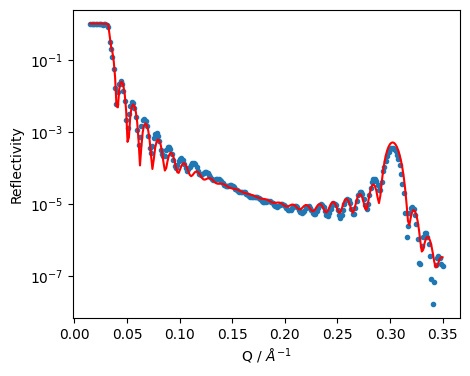

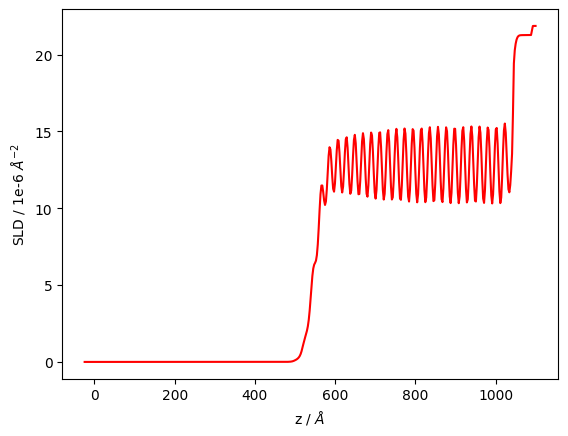

2.046076123013532: : 43it [03:22,  4.71s/it] 
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
Parameters:       ''       
<Parameter:  ' - thick'   , value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters:       ''       
<Parameter:   ' - sld'    , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:   ' - isld'   , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  ' - rough'   , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:' - volfrac solvent', value=0 (fixed)  , bounds=[0.0, 1.0]>
________________________________________________________________________________
Parameters:      None      
<Parameter:      ''       , value=50 (fixed)  , bounds=[-inf, inf]>
<Parameter:      ''       , value=20.8405 +/- 0.00693, bounds=[19.0, 24.0]>
<Parameter:      ''       , va

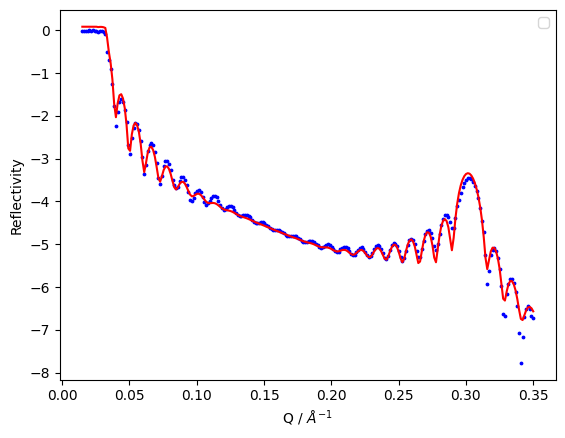

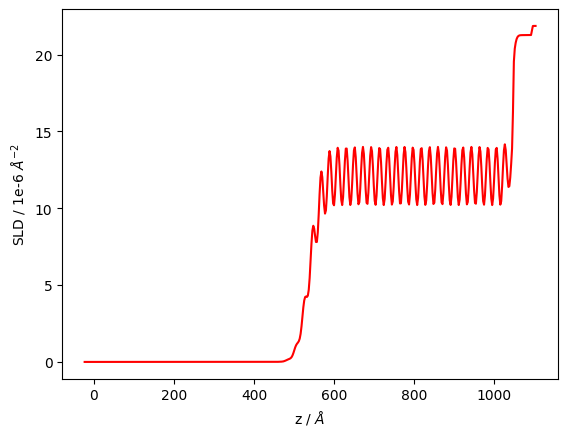

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(5, 4), dpi=100)
norm = np.load("normalization_PTCDI.npy", allow_pickle =True)
data= data_load("Pilatus_Interpolated.txt")
label = model.predict(data)
data_P = np.loadtxt("Pilatus_Interpolated.txt")
labels = np.ones([1,7])
l_pilatus = np.ones([7])
for k in range(7): 
    l_pilatus[k] = label[:,k]*(norm[k,0]-norm[k,1])+norm[k,1]
prediction = l_pilatus
labels = np.append(labels, label, axis=0)
print(prediction)
%run -i BP_fit.py
objective1 = objective
s1 = s
sN1 = sN
original1 = data_Origin[:,1]
model_N1 = model_N(q2)


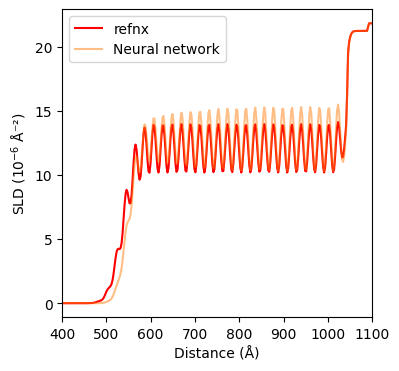

In [6]:
z, sld1 = s1.sld_profile()
z, sldN = sN.sld_profile()


# Plot the SLD profile
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(z, sld1, 'r', label = 'refnx')
plt.plot(z, sldN, 'C1', alpha = 0.5, label = 'Neural network')
plt.xlabel('Distance (Å)')
plt.ylabel('SLD ($10^{-6}$ Å⁻²)')
plt.legend()
plt.xlim([400,1100])
plt.show()

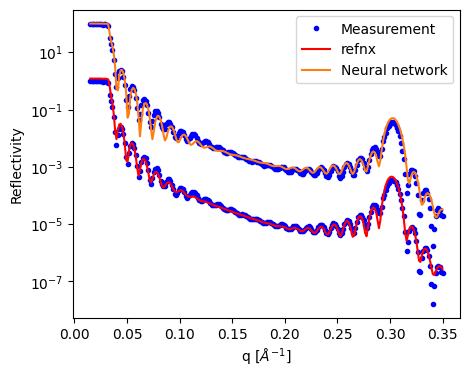

In [7]:
q_values = objective1.data.x
rdata1 = objective1.data.y
rmodel1 = objective1.model(q_values)

plt.figure(figsize=(5, 4), dpi=100)
plt.plot(q_values, rdata1, 'b.', label = 'Measurement')
plt.plot(q_values, rmodel1, 'r', label = 'refnx')
plt.plot(q2, data_Origin[:,1]*100, 'b.')
plt.plot(q2, model_N(q2)*100, 'C1', label = 'Neural network')
plt.xlabel("q [$\\AA^{-1}$]")
plt.ylabel("Reflectivity")
plt.legend()
plt.yscale('log')